In [ ]:
from math import sqrt,log2
import numpy as np
import random
import collections   
from sortedcontainers import SortedDict


In [ ]:
NO_OF_USERS = 100
NO_OF_BROADCAST_SERVERS = 10
BW = 10 #bandwidth 
alpha = 2.5# txf
NOISE = 0.0005
DISTANCE_THRES = 200

In [ ]:
#Defining User and Bandwidth-Server classes
class User:
    def __init__(self,uID,loc):
        self.preference_list =[]
        self.uID = uID
        self.X = loc[0]
        self.Y = loc[1]
        self.target = None
class BS :
    def __init__(self,bID,loc):
        self.preference_list = []
        self.bID = bID
        self.X = loc[0]
        self.Y = loc[1]
        self.associatedUsers = set() 

In [ ]:
random.seed(1)
x_coord = random.sample(range(1,500),NO_OF_USERS+NO_OF_BROADCAST_SERVERS)
random.seed(2)
y_coord = random.sample(range(1,500),NO_OF_USERS+NO_OF_BROADCAST_SERVERS)


#the users have been id from 1 to 100
#the BSs have been id-ed from 101 to 110
Users = [User(i,(x_coord[i],y_coord[i])) for i in range(100)]
BSs = [BS(i,(x_coord[i+100],y_coord[i+100])) for i in range(10)]

In [ ]:
distance_Mat =[sqrt((Users[j].X -BSs[i].X )**2 + (Users[j].Y -BSs[i].Y )**2) for i in range(0,10) for j in range (0,100)]
distance_Mat = (np.array(distance_Mat)).reshape(10,100)


In [ ]:

def preflistBuilderforBSs():
    for i in range(10):
        pref_dict =  SortedDict()              #collections.OrderedDict()
        pref_list =  [] 
        for j in range(100):
            a = distance_Mat[i][j]
            if a<= DISTANCE_THRES:
                pref_dict[a] = j
        for key,value in pref_dict.items():
            pref_list.append(value)
        BSs[i].preference_list = pref_list
        

In [ ]:
rx = alpha/(distance_Mat**2)
interactions= np.zeros((10,100))
for i in range(10):
    for j in range(100):
        interactions[i][j] = np.sum([rx[p][j]for p in range(10) if p!=i])




In [ ]:
def preflistBuilderforUsers(n:int):   #n is no of users  in BS   
    for j in range(100):
        pref_dict =SortedDict()
        pref_list =[] 
        for i in range(10):
            a = (BW/n)*log2(1+ (rx[i][j]/(NOISE + interactions[i][j])))
            pref_dict[a]=i
            
        for key,value in pref_dict.items():
            pref_list.append(value)
        pref_list.reverse()
        Users[j].preference_list = pref_list

In [ ]:
listUsers=[]
listBSs=[]
r=NO_OF_USERS/NO_OF_BROADCAST_SERVERS
preflistBuilderforUsers(r)
preflistBuilderforBSs()

for i in range(NO_OF_USERS):
  listUsers.append(Users[i].preference_list)
for i in range(NO_OF_BROADCAST_SERVERS):
  listBSs.append(BSs[i].preference_list)






In [ ]:
# for i in range(NO_OF_BROADCAST_SERVERS):
#     print(listBSs[i])
#     print()

for i in range(40):
    print(listUsers[i])
    

[4, 7, 3, 8, 0, 1, 9, 5, 6, 2]
[7, 3, 1, 4, 0, 8, 6, 2, 9, 5]
[3, 7, 1, 6, 4, 0, 8, 2, 9, 5]
[3, 7, 1, 6, 0, 4, 8, 2, 9, 5]
[2, 0, 8, 6, 1, 5, 9, 4, 3, 7]
[5, 9, 8, 2, 0, 4, 1, 6, 7, 3]
[5, 9, 2, 8, 0, 4, 1, 6, 7, 3]
[9, 5, 8, 4, 0, 2, 1, 7, 6, 3]
[4, 7, 3, 1, 0, 8, 6, 2, 9, 5]
[2, 0, 8, 6, 1, 4, 9, 5, 3, 7]
[4, 8, 1, 0, 7, 3, 6, 9, 2, 5]
[4, 7, 1, 3, 0, 8, 6, 9, 2, 5]
[1, 0, 6, 8, 7, 3, 4, 2, 9, 5]
[4, 7, 3, 1, 8, 0, 6, 9, 2, 5]
[2, 0, 6, 8, 1, 4, 3, 7, 9, 5]
[9, 5, 8, 0, 2, 4, 1, 6, 7, 3]
[4, 9, 8, 5, 0, 1, 7, 2, 3, 6]
[2, 8, 0, 9, 5, 1, 4, 6, 7, 3]
[4, 7, 9, 8, 0, 3, 1, 5, 6, 2]
[2, 0, 6, 8, 1, 5, 9, 4, 3, 7]
[6, 1, 0, 3, 8, 7, 2, 4, 9, 5]
[4, 8, 0, 1, 7, 3, 9, 6, 2, 5]
[2, 8, 5, 0, 9, 4, 1, 6, 7, 3]
[0, 8, 2, 1, 6, 4, 7, 3, 9, 5]
[1, 6, 0, 3, 7, 8, 4, 2, 9, 5]
[2, 0, 6, 8, 1, 4, 3, 7, 9, 5]
[4, 9, 8, 0, 5, 7, 1, 3, 6, 2]
[1, 3, 7, 6, 0, 8, 4, 2, 9, 5]
[4, 7, 3, 1, 8, 0, 6, 9, 2, 5]
[4, 8, 9, 0, 5, 1, 2, 7, 6, 3]
[2, 0, 8, 6, 1, 4, 3, 7, 9, 5]
[6, 1, 0, 3, 2, 8, 7, 4, 9, 5]
[9, 8, 4

In [ ]:

userFree =[True for i in range(NO_OF_USERS)]   #keeps track of users who are free

BSallowedForIteration=[True for i in range(NO_OF_BROADCAST_SERVERS)]
BSmaxCapacity = [len(listBSs[i]) for i in range(NO_OF_BROADCAST_SERVERS)]
BSprevcurrFilled = [0 for i in range(NO_OF_BROADCAST_SERVERS)] 
BScurrFilled =   [0 for i in range(NO_OF_BROADCAST_SERVERS)]    



#stores final result
marriage=[]   
for i in range(NO_OF_BROADCAST_SERVERS):
    marriage.append([])
satisfaction_rate =[0 for i in range(NO_OF_USERS)]


print(BSmaxCapacity )                    
                     

[60, 51, 36, 30, 56, 21, 38, 34, 58, 26]


In [ ]:
def proposal(user,itern):
    if userCount[user] < NO_OF_BROADCAST_SERVERS:
        pref_no  = userCount[user] 
        BStoPropose = listUsers[user][pref_no]
        userCount[user] = userCount[user]+1
        if BSallowedForIteration[BStoPropose] == True and (user) in listBSs[BStoPropose] :
            if BScurrFilled[BStoPropose] < itern:
                marriage[BStoPropose].append(user)
                BScurrFilled[BStoPropose]=1+BScurrFilled[BStoPropose]
                userFree[user]=False
                satisfaction_rate[user] = (itern - 1)*10 + (pref_no+1)


            else:
                if listBSs[BStoPropose].index(marriage[BStoPropose][-1])> listBSs[BStoPropose].index(user) :
                    abanded =  marriage[BStoPropose][-1]
                    #abanded=abanded-1
                    marriage[BStoPropose].pop()
                    marriage[BStoPropose].append(user)
                    userFree[user]=False
                    satisfaction_rate[user] = (itern - 1)*10 + (pref_no+1)
                    userFree[abanded]=True
                    satisfaction_rate[abanded] = 0
                    proposal(abanded,itern)
                else :
                    proposal(user,itern)
        else:
            userCount[user] = userCount[user]+1

        

In [ ]:
userCount = [0 for i in range(NO_OF_USERS)] 

for i in range(max(BSmaxCapacity)):         #number of iterations required  max(BSmaxCapacity)
    for j in range(NO_OF_USERS):
        if userFree[j]==True :
            proposal(j,i+1)


    #prepare for next iteration
    userCount = [0 for i in range(NO_OF_USERS)] 
            
    preflistBuilderforUsers(i+1)
    listUsers = []
    for x in range(NO_OF_USERS):
        listUsers.append(Users[x].preference_list)
    for x in range(NO_OF_BROADCAST_SERVERS):
        if BScurrFilled[x]==BSprevcurrFilled[x] or BScurrFilled[x] == BSmaxCapacity[x]  :
            BSallowedForIteration[x] = False
        BSprevcurrFilled[x]=BScurrFilled[x]


    
    
    





In [ ]:
for i in range(NO_OF_BROADCAST_SERVERS):
    print(marriage[i])
test = set()
assigned = 0
for x in range(10):
    test.update(marriage[x])
    assigned = assigned + len(marriage[x])


print(assigned,len(test))

[67, 86, 33, 40, 82, 59, 53, 17, 62]
[12, 78, 27, 71, 97, 45, 25]
[48, 75, 9, 72, 14, 50, 55, 30, 4, 19, 54]
[3, 66, 2, 35, 61, 52, 89]
[21, 96, 76, 10, 79, 95, 81, 13, 60, 93, 70, 74, 58, 98, 69, 0, 37, 26]
[5, 46, 83, 38, 6, 51, 73, 22]
[20, 24, 31, 80, 64, 43, 77, 94, 49]
[1, 90, 68, 88, 8, 11, 28, 44, 57, 36]
[87, 92, 23, 65, 47, 99, 41, 84, 29]
[34, 7, 39, 15, 42, 85, 32, 63, 56, 16, 91]
99 99


In [ ]:
print(satisfaction_rate)

[151, 1, 21, 1, 81, 1, 41, 11, 42, 21, 31, 52, 1, 71, 41, 31, 92, 73, 0, 91, 1, 1, 73, 22, 12, 65, 171, 21, 62, 82, 71, 21, 61, 21, 1, 31, 92, 161, 31, 21, 31, 61, 41, 51, 72, 51, 11, 41, 1, 82, 51, 51, 51, 62, 101, 61, 82, 82, 121, 51, 81, 41, 83, 72, 41, 31, 11, 1, 22, 141, 101, 31, 31, 64, 111, 11, 21, 61, 11, 41, 31, 61, 41, 22, 71, 51, 11, 1, 31, 63, 11, 102, 11, 91, 72, 51, 11, 41, 131, 51]


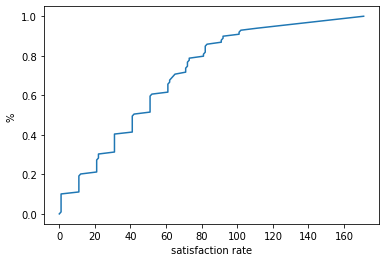

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
data_sorted = np.sort(satisfaction_rate)


#p = 1. * np.arange(len(data_sorted)) / (len(data_sorted) - 1)
p=np.linspace(0, 1, len(data_sorted))
# plot the sorted data:
fig = plt.figure()
plt.plot(data_sorted, p)
plt.xticks(np.arange(min(data_sorted), max(data_sorted)+1, 20))
plt.xlabel('satisfaction rate')
plt.ylabel('% ')
plt.show()

# Printing format

marriage is the list to be used for printing and satisfaction rate is the list specifying satisfaction value

In [ ]:
for i in range(NO_OF_BROADCAST_SERVERS):
  print(marriage[i])
  

[67, 86, 33, 40, 82, 59, 53, 17, 62]
[12, 78, 27, 71, 97, 45, 25]
[48, 75, 9, 72, 14, 50, 55, 30, 4, 19, 54]
[3, 66, 2, 35, 61, 52, 89]
[21, 96, 76, 10, 79, 95, 81, 13, 60, 93, 70, 74, 58, 98, 69, 0, 37, 26]
[5, 46, 83, 38, 6, 51, 73, 22]
[20, 24, 31, 80, 64, 43, 77, 94, 49]
[1, 90, 68, 88, 8, 11, 28, 44, 57, 36]
[87, 92, 23, 65, 47, 99, 41, 84, 29]
[34, 7, 39, 15, 42, 85, 32, 63, 56, 16, 91]


In [ ]:
len(satisfaction_rate)

100

In [ ]:
# final_answer_dict={}
# for i in range(n1):
#   final_answer_dict[i+user_start]=[]
# for i in range(n1):
#   final_answer_dict[i+user_start].append(bitrate_calculator[i])
#   final_answer_dict[i+user_start].append(satisfaction_rate[i])
#   temp=index_2d(server_patner,i+user_start)
#   final_answer_dict[i+user_start].append(temp+router_start)

# from prettytable import PrettyTable as pt
# t=pt(['User_ID','Bitrate_Received_For_Marrying','Satisafcation_Rate','Band-width_Server']) 
# for i in range(n1):
#   list_temp=[]
#   list_temp.append(i+user_start)
#   list_temp.append(final_answer_dict[i+user_start][0])
#   list_temp.append(final_answer_dict[i+user_start][1])
#   list_temp.append(final_answer_dict[i+user_start][2])
#   t.add_row(list_temp)
#   list_temp.clear()

# print(t)

In [ ]:
marriage_dict={}
#the dictionary will contain the user as the key and the corresponding band width server it is married to 
#will be the value
for i in range(NO_OF_USERS):
  marriage_dict[i]=[]
  marriage_dict[i].append(satisfaction_rate[i])
  flag = False
  for j in range(NO_OF_BROADCAST_SERVERS):
    if (i in marriage[j]):
      marriage_dict[i].append(j)
      flag = True
      break
  if (flag == False):
    marriage_dict[i].append("None")
  
from prettytable import PrettyTable as pt
t=pt(['User_ID','Satisafcation_Rate','Band-width_Server']) 
for i in range(NO_OF_USERS):
  list_temp=[]
  list_temp.append(i)
  list_temp.append(marriage_dict[i][0])
  list_temp.append(marriage_dict[i][1])
  t.add_row(list_temp)
  list_temp.clear()

print(t)



+---------+--------------------+-------------------+
| User_ID | Satisafcation_Rate | Band-width_Server |
+---------+--------------------+-------------------+
|    0    |        151         |         4         |
|    1    |         1          |         7         |
|    2    |         21         |         3         |
|    3    |         1          |         3         |
|    4    |         81         |         2         |
|    5    |         1          |         5         |
|    6    |         41         |         5         |
|    7    |         11         |         9         |
|    8    |         42         |         7         |
|    9    |         21         |         2         |
|    10   |         31         |         4         |
|    11   |         52         |         7         |
|    12   |         1          |         1         |
|    13   |         71         |         4         |
|    14   |         41         |         2         |
|    15   |         31         |         9    